In [4]:
"""
Make a "broken" horizontal bar plot, ie one with gaps
"""
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

def plot_range_all(lower,upper,gender,name_lst):
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    # start start+len
    
    for i in range(len(name_lst)):
        y_pos = (i+1)*20
        if gender[i] == "M":
            ax.broken_barh([ (lower[i],upper[i]-lower[i])] , (y_pos, 9), facecolors='blue')
        else:
            ax.broken_barh([ (lower[i],upper[i]-lower[i])] , (y_pos, 9), facecolors='red')
            
    ax.set_xlabel('note range')
    ax.set_yticks(range(25,25+len(name_lst)*20,20))
    ax.set_yticklabels(name_lst)
    ax.set_ylim(5,25+len(name_lst)*20)
    ax.set_xlim(20,55)
    ax.grid(True)
    red_patch = mpatches.Patch(color='red', label='Female')
    blue_patch = mpatches.Patch(color='blue', label='Male')
    plt.legend(handles=[blue_patch,red_patch])
    
    plt.show()
    return fig

In [76]:
range(5,20)

range(5, 20)

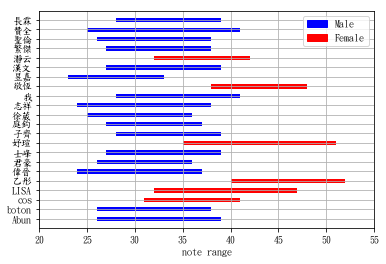

In [5]:
import os
import json
import soundfile as sf
import pyworld as pw
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['font.family'] = 'DFKai-sb'
plt.rcParams.update({'font.size': 10})

wav_dir = 'gliss_dataset'
all_name = os.listdir(wav_dir)
all_lower = np.zeros(shape=(len(all_name),))
all_upper = np.zeros(shape=(len(all_name),))
gender_lst = []

for i,who in enumerate(all_name):  
    rangePath = os.path.join(wav_dir,who,"info.json")
    with open(rangePath, 'r') as f:
        info = json.load(f)
        [min_note,max_note] = info['pRange']
        gender_lst += info['gender']

    all_lower[i] = min_note
    all_upper[i] = max_note
fig = plot_range_all(all_lower,all_upper,gender_lst,all_name)
fig.savefig('note_range.png', dpi=200)
